## Podstawy KERAS

### Podstawy pracy z obrazkami

Zbiory: 50 000 kolorowych obrazków treningowych (_train) 10 000 testowych (_test)
o rozdzielczości 32 x 32, oznaczonych 10 kategoriami

In [1]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Etykiety, które chcemy przewidywać naszą siecią neuronową, są cyframi, oznaczającymi klasę:

In [2]:
y_test[0]

array([3])

In [3]:
print(x_train.shape)

(50000, 32, 32, 3)


Obrazek możemy wyświetlić w następujący sposób, korzystając z matplotlib i metody imshow:

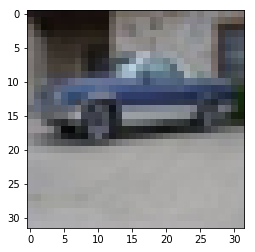

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10000])
plt.show()

### Reprezentacja etykiet (wyjścia) w sieciach neuronowych

Sieci neuronowe wymagają innej reprezentacji i obsługi etykiet niż cyfry 0-9. Służy temu tzw kodowanie "one-hot".
Dla danej klasy podajemy 1 dla "jej" neuronu ("gorąca jedynka"), 0 – dla wszystkich pozostałych.
Konwersja do kodowania one-hot:

In [6]:
from keras.utils import np_utils
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Podejrzyjmy jak wygląda reprezentacja one-hot:

In [7]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Reprezentacja obrazów (wejścia) w sieciach neuronowych

Dane wejściowe muszą zostać "spłaszczone" do pojedynczego wektora.

Zestaw danych treningowych jest zapisany jako 3-wymiarowa macierz obrazów, dla każdego koloru mamy szerokość * wysokość obrazka. W przypadku wielowarstwowej sieci neuronowej musimy zmniejszyć obrazy do wektora pikseli. W tym przypadku, obrazy o rozmiarze 32 x 32 będą miały wartość wejściową 1024 pikseli * 3 = 3072

In [10]:
x_train[0].shape

(32, 32, 3)

Podając obrazki na wejście sieci typu Dense/perceptron musimy je spłaszczyć do jednowymiarowego wektora (uwaga! od tej pory używamy X_train zamiast x_train):

In [11]:
num_pixels = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
X_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
X_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

Sprawdzmy wynik tej operacji:

In [12]:
X_train[0].shape

(3072,)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Modele w kerasie najwygodniej tworzyć korzystając z funkcjonalnego API:
https://keras.io/models/model/

Typy warstw zaimplementowanych w keras:
https://keras.io/layers/core/

Poniższy przykład tworzy 2-warstwową sieć typu Dense/perceptron oraz uruchamia proces uczenia.

UWAGA! czas wykonania jednej epoki może zająć kilka do kilkunastu minut!

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# Wymiarowosc wejscia sieci musi zgadzac sie z x_train.shape
inputs = Input(shape=(num_pixels,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(num_pixels, activation='relu')(inputs)
#x = Dense(num_pixels, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# tworzenie modelu z wejsciem inputs i wyjsciem predictions
# uwaga: w keras 1.x zmien nazwy: inputs->input oraz outputs->output
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3)  # zaczynamy trening! tutaj ustawiamy liczbe epok


Epoch 1/3
50000/50000 [==============================] - 226s 5ms/step - loss: 14.5063 - acc: 0.1000
Epoch 2/3
50000/50000 [==============================] - 226s 5ms/step - loss: 14.5063 - acc: 0.1000
Epoch 3/3
50000/50000 [==============================] - 227s 5ms/step - loss: 14.5063 - acc: 0.1000


Możemy ocenić jakość wytrenowanej sieci na zbiorze testowym, używając funkcji evaluate. Opis API tutaj: https://keras.io/models/model/

In [16]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

10000/10000 [==============================] - 5s 514us/step
[14.506285696411133, 0.1]


Ćwiczenia:

1. Dodaj warstwę Dropout przed warstwę z aktywacją "softmax", ustaw parametr dropout na 0.5, wytrenuj sieć i przetestuj na zbiorze testowym. Jak zmieniły się wyniki?

2. Przetestuj inny wybrany algorytm optymalizacyjny (https://keras.io/optimizers/) z tą samą liczbą epok. Wytrenuj sieć i przetestuj na zbiorze testowym. Jak zmieniły się wyniki? 

3. Zmień liczbę epok na kilkukrotnie wyższą (10?), wytrenuj sieć i przetestuj na zbiorze testowym. Jak zmieniły się wyniki?

4. Wykonaj wizualizację modelu (https://keras.io/visualization/)

5. Stwórz model sieci złożony z następujących warstw:
  - Conv2D, 32 filtry (5, 5) - wejściowa
  - MaxPooling2D, rozmiar (2, 2)
  - Dropout 0.25
  - Dense
  - Dropout 0.25
  - Dense
  Wszędzie za wyjątkiem ostatniej warstwy stosuj aktywację relu - tutaj zastosuj softmax.
  Wytrenuj sieć i przetestuj na zbiorze testowym. 


In [15]:
towardsdatascience.com

NameError: name 'towardsdatascience' is not defined